## В этой лабораторной работе будет построено решение следующей задачи методом стрельбы

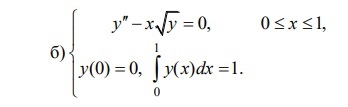

Будем задавать значение производной функции y в точке 0:      $$y'(0) = a$$
Тогда, в силу теоремы существования и единственности решения задачи Коши, при конкретном параметре **а** решение существует и единственно. Значит, изменяя значение этого параметра, получаем всевозможные функции, удовлетворяющие исходному уравнению и условию y(0) = 0.     
Параметр **а** подбирается так, чтобы удовлетворять условию (в случае этой задачи, заданному определённым интегралом). Таким образом, будет найдено решение, удовлетворяющее исходной задаче. В этом и заключается метод стрельбы

In [60]:
import math as m
import numpy as np
import time
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
def makeplot(x, y, xlabel = "x", ylabel = "y", title = 0, grid = 1, label = 0):
    clear_output(wait=True)
    if label != 0:
        plt.plot(x, y, label = label, color = np.random.rand(3))
        plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
    else:
        plt.plot(x, y, color = np.random.rand(3))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title != 0:
        plt.title(title)
    if grid:
        plt.grid()

Будем решать задачу следующим образом: 
1) Для нахождения решения уравнения используем метод Рунге-Кутты 4 порядка. Система нежёсткая, а значит решение будет получено с низкой ошибкой      
2) Получившееся решение не имеет особенностей, поэтому используем метод трапеций для его численного интегрирования    
3) Бинарным поиском будем подбирать параметр **а** так, чтобы определённый интеграл решения на отрезке [0, 1] отличался от единицы не более чем на $10^{-7}$. При этом параметре полученное решение и будет искомым

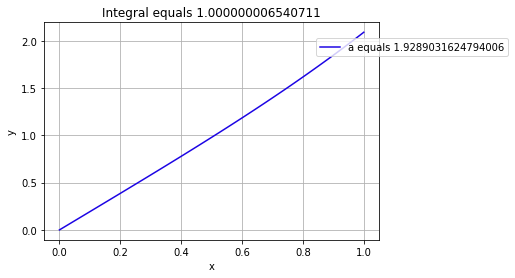

In [67]:
def func(x, y):
    return x * m.sqrt(y)
def derivs(x, y):
    return np.array([y[1], func(x, y[0])])

#поставим начальные условия:
l, r = 0, 100
I = 0 
eps = 10**-7

while (abs(I - 1) > eps):
    
    a = (l+r)/2
    x = 0
    y = np.array([0, a]) #нач. условия на y
    dx = 0.01 # размер шага

    y_table = np.array([y])
    x_table = [x]
    while (x < 1):
        k1 = derivs(x, y)
        k2 = derivs(x+dx/2, y+dx*k1/2)
        k3 = derivs(x+dx/2, y+dx*k2/2)
        k4 = derivs(x+dx,   y+dx*k3)

        y = y + dx/6*(k1+2*k2+2*k3+k4)
        x = x + dx

        y_table = np.append(y_table, [y], axis = 0)
        x_table.append(x)

    y_table = y_table.transpose()  
    print('what')
    #численное интегрирование методом трапеций
    I = dx * (np.sum(y_table[0]) - 0.5 * (y_table[0][0] + y_table[0][-1]))
    plt.clf()
    makeplot(x_table, y_table[0], title = f"Integral equals {I}", label = f"a equals {a}")
    plt.show()
    if I > 1:
        r = a
    else:
        l = a
    time.sleep(1)

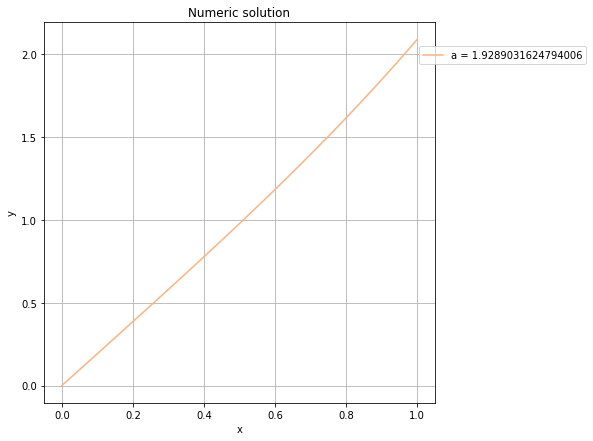

In [62]:
plt.figure(figsize = (7, 7))
makeplot(x_table, y_table[0], title = "Numeric solution", label = f"a = {a}") 
plt.show()

Построим также график производной найденной функции:

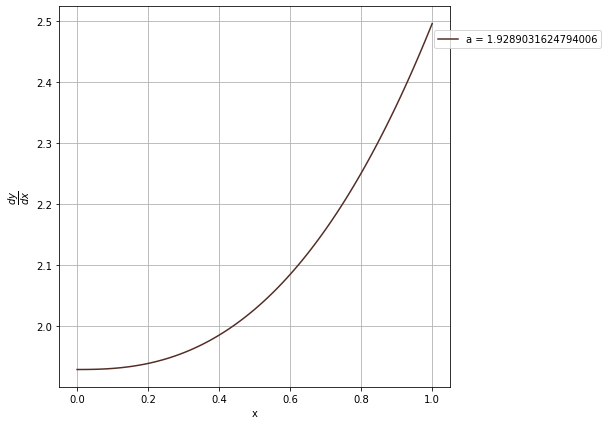

In [63]:
plt.figure(figsize = (7, 7))
makeplot(x_table, y_table[1], ylabel = "$\dfrac{dy}{dx}$", label = f"a = {a}")

Таким образом, получено численное решение исследуемой задачи